# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
from tabulate import tabulate
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

In [3]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# Exploratory Data Analysis

In [4]:
# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [5]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

### Calculate the duration of each sample in seconds

EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels. "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

In [6]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz

num_samples, num_channels, num_time_points = eeg_samples.shape
sample_duration = num_time_points / sampling_rate

### Check for missing values

In [7]:
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


In [8]:
print("Number of subjects:", len(np.unique(subindex)))
print("EEGsample shape:", eeg_samples.shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(substates, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

## State-specific Analysis: 'Alert' and 'Drowsy'

In [9]:
substates_flat = substates.flatten()

In [10]:
# Calculating means and standard deviations for each channel in both states

#Alert States
mean_alert = np.mean(eeg_samples[substates_flat == 0], axis=(0, 2))
std_alert = np.std(eeg_samples[substates_flat == 0], axis=(0, 2))

#Drowsy States
mean_drowsy = np.mean(eeg_samples[substates_flat == 1], axis=(0, 2))
std_drowsy = np.std(eeg_samples[substates_flat == 1], axis=(0, 2))

In [11]:
# Creating a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Channel': range(1, 31),
    'Mean_Alert': mean_alert,
    'Std_Alert': std_alert,
    'Mean_Drowsy': mean_drowsy,
    'Std_Drowsy': std_drowsy
})

In [12]:
stats_df  

,Channel,Mean_Alert,Std_Alert,Mean_Drowsy,Std_Drowsy
0,1,0.120450,17.630071,-0.163686,10.802148
1,2,0.082160,17.209800,-0.163763,12.170468
2,3,0.052289,9.635932,-0.061430,9.706984
3,4,0.002035,30.798487,-0.113082,11.617223
4,5,0.022715,9.642534,-0.159155,11.707889
5,6,0.021788,26.476227,-0.154311,17.197473
6,7,0.019232,12.678096,-0.126242,9.635353
7,8,0.046900,8.752803,-0.070030,9.094665
8,9,0.023307,9.758593,-0.130595,11.230886
9,10,0.017935,9.891951,-0.138523,12.140691


## EEG Channel Statistics Across Subjects and Timepoints

In [13]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

In [14]:
# Printing the table
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="grid"))

Basic Statistics for EEG Channels
+-----------+---------+-----------+-----------+----------+
|   Channel |    Mean |   Std Dev |       Min |      Max |
+===========+=========+===========+===========+==========+
|         1 | -0.0216 |   14.621  |  -573.236 |  871.908 |
+-----------+---------+-----------+-----------+----------+
|         2 | -0.0408 |   14.9052 | -1299.32  |  911.153 |
+-----------+---------+-----------+-----------+----------+
|         3 | -0.0046 |    9.6717 |  -208.161 |  243.286 |
+-----------+---------+-----------+-----------+----------+
|         4 | -0.0555 |   23.2757 | -1302.31  | 1795.54  |
+-----------+---------+-----------+-----------+----------+
|         5 | -0.0682 |   10.7254 |  -259.186 |  157.868 |
+-----------+---------+-----------+-----------+----------+
|         6 | -0.0663 |   22.3244 | -1914.6   | 1294.24  |
+-----------+---------+-----------+-----------+----------+
|         7 | -0.0535 |   11.2602 |  -496.507 |  754.21  |
+-----------+---------

# Segregating the data into alert and drowsy states

In [15]:
import scipy.io

In [16]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

In [17]:
# Segregate the data into alert and drowsy states
alert_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 0, :]
drowsy_data = mat_data['EEGsample'][mat_data['substate'][:, 0] == 1, :]

In [18]:
# Save the segregated data as new datasets
scipy.io.savemat('alert_data.mat', {'EEGsample': alert_data})
scipy.io.savemat('drowsy_data.mat', {'EEGsample': drowsy_data})

# Data Manipulation - Alert State

In [19]:
# Load the alert data
alert_data = scipy.io.loadmat('alert_data.mat')

# Transpose the EEGsample for each sample
transposed_alert_data = np.transpose(alert_data['EEGsample'], (0, 2, 1))

transposed_alert_data.shape

(1011, 384, 30)

In [20]:
# Concatenate all the samples together
Manipulated_Alert_Data = np.concatenate(transposed_alert_data, axis=0)

Manipulated_Alert_Data.shape

(388224, 30)

In [21]:
# Create a new dataframe with the concatenated EEG values
Manipulated_Alert_Data = pd.DataFrame(Manipulated_Alert_Data)

In [22]:
Manipulated_Alert_Data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_Alert_Data['substate'] = 0

In [23]:
Manipulated_Alert_Data_shape = Manipulated_Alert_Data.shape
print(Manipulated_Alert_Data_shape)

(388224, 31)


In [24]:
Manipulated_Alert_Data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,4.080976,3.786023,8.346804,6.719097,8.357521,8.916676,6.862104,9.614278,8.955653,11.076102,...,4.477457,1.590643,8.856600,6.898189,3.846108,1.618809,1.528848,-1.199498,1.594009,0
1,5.363737,6.188060,8.691601,6.594982,7.950093,8.835506,7.987136,8.394441,7.126653,8.356511,...,2.415757,1.918520,7.423708,3.755487,1.427838,-0.657721,0.793796,-1.544962,1.900514,0
2,2.168923,1.727106,-0.010906,10.583628,2.440252,1.746089,1.159202,-1.002561,7.059705,1.720240,...,-4.692833,4.261903,3.151329,-1.637562,-5.816451,-8.913891,-1.451266,-4.319859,-4.644263,0
3,6.682761,4.633752,2.093427,16.253235,6.105603,3.943814,4.016592,2.393903,17.343024,6.441727,...,0.839859,2.543160,7.499411,4.182199,-0.059025,-0.736035,4.434387,3.438641,1.207515,0
4,9.795314,8.723788,10.936554,8.182007,8.306618,7.103265,7.980278,12.270826,9.309045,6.750704,...,2.970653,-0.216052,5.413562,5.600711,2.837383,4.172009,0.202442,1.743480,3.413565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388219,8.233965,0.275736,6.446871,5.908036,9.747110,11.439683,-1.685268,5.394103,5.898229,12.230832,...,-6.909897,-8.072416,-0.579174,5.365872,-2.507618,-7.071795,-5.722929,2.618950,-3.075700,0
388220,7.406664,9.878674,-3.062066,9.699165,12.825886,16.227294,11.658202,0.792909,8.312962,14.986136,...,-4.750323,-9.749710,0.661105,7.605404,0.084582,-4.264237,-3.538781,3.539202,-0.909379,0
388221,13.849187,15.022659,-0.428879,12.096121,18.726862,20.367732,21.341497,-0.920176,11.466241,19.145924,...,2.819010,-14.607244,1.367658,10.402462,6.190984,3.495143,-5.398682,3.006524,-0.195928,0
388222,16.960690,11.183629,8.472685,8.712444,17.208050,19.493375,19.953374,2.115628,10.656352,18.752221,...,9.265103,-15.256238,-1.057022,8.016603,8.461495,8.418237,-9.056400,0.705703,-0.641096,0


In [25]:
Manipulated_Alert_Data.describe()

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
count,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,...,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.000000,388224.0
mean,0.120450,0.082160,0.052289,0.002035,0.022715,0.021788,0.019232,0.046900,0.023307,0.017935,...,0.021766,0.007225,-0.003592,0.019598,0.010883,0.033979,0.010209,-0.011278,0.016158,0.0
std,17.630093,17.209822,9.635944,30.798527,9.642547,26.476261,12.678112,8.752815,9.758606,9.891964,...,8.139659,7.684464,8.780677,9.051305,8.877557,7.612380,8.213531,8.012668,8.402200,0.0
min,-573.236473,-1299.322323,-179.743368,-1302.310821,-259.186417,-1914.601674,-496.506648,-257.126168,-264.446044,-170.110365,...,-412.436568,-164.084974,-182.130863,-160.504457,-188.102204,-300.202835,-155.316775,-164.679904,-170.630668,0.0
25%,-4.776408,-5.200087,-4.309381,-5.210375,-5.136774,-5.298737,-4.533854,-3.814357,-5.077397,-5.446187,...,-3.618430,-3.631967,-4.483550,-4.728144,-4.541708,-3.618739,-3.935085,-3.812024,-3.973197,0.0
50%,-0.075639,-0.078809,0.021210,-0.007062,-0.025080,-0.004596,0.032909,0.000847,0.002038,-0.015818,...,0.072676,0.064908,0.021311,0.014776,0.011861,0.067332,0.070167,0.027562,0.061650,0.0
75%,4.674139,5.061314,4.318260,5.122598,5.058932,5.269095,4.578348,3.898470,5.029046,5.397253,...,3.720945,3.728646,4.505347,4.764787,4.597949,3.740409,4.070610,3.884409,4.121255,0.0
max,871.907755,911.153120,243.285973,1795.543933,157.868435,1116.638265,754.210204,178.262784,358.262495,172.711611,...,169.197791,221.973860,228.132948,167.531582,191.191891,159.280290,153.842957,148.846683,146.055474,0.0


In [26]:
# Save the new dataframe as a CSV file
Manipulated_Alert_Data.to_csv('Manipulated_Alert_Data.csv', index=False)

# Data Manipulation - Drowsy State

In [32]:
# Load the alert data
drowsy_data = scipy.io.loadmat('drowsy_data.mat')

# Transpose the EEGsample for each sample
transposed_drowsy_data = np.transpose(drowsy_data['EEGsample'], (0, 2, 1))

transposed_drowsy_data.shape

(1011, 384, 30)

In [33]:
# Concatenate all the samples together
Manipulated_drowsy_data = np.concatenate(transposed_drowsy_data, axis=0)

Manipulated_drowsy_data.shape

(388224, 30)

In [34]:
# Create a new dataframe with the concatenated EEG values
Manipulated_drowsy_data = pd.DataFrame(Manipulated_drowsy_data)

In [35]:
Manipulated_drowsy_data.columns = ['EEG {}'.format(i) for i in range(1, 31)]

Manipulated_drowsy_data['substate'] = 1

Manipulated_drowsy_data

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10,...,EEG 22,EEG 23,EEG 24,EEG 25,EEG 26,EEG 27,EEG 28,EEG 29,EEG 30,substate
0,-9.340455,-2.581835,0.605112,-1.951353,-1.691814,0.000079,3.330641,-0.191926,-4.416670,-1.147983,...,2.129284,-3.047745,-4.376038,-3.188374,-0.385878,1.875040,-5.343100,-3.923701,-2.074438,1
1,-9.297278,1.208397,1.506896,-2.264259,-0.276102,2.584222,6.163738,1.151379,-4.483509,0.162938,...,5.101435,-6.010214,-4.166642,-2.759660,1.960440,2.900005,-5.235632,-4.409118,-0.922046,1
2,-5.377346,4.373476,1.989039,0.960820,4.204186,7.833417,6.751105,1.460457,-1.914790,4.162968,...,4.944842,-5.937366,-2.171945,1.778525,4.798910,3.802374,-4.404817,-2.675341,1.579044,1
3,-0.387827,6.691171,5.519700,7.556678,9.908533,9.829516,7.316607,5.024432,4.905958,11.028363,...,7.509409,-2.738498,3.898276,9.131125,11.175130,7.386306,-0.541670,2.996915,6.289799,1
4,4.371176,8.625327,7.997311,13.974010,13.865399,12.207135,6.853086,7.709539,11.165707,16.520067,...,9.410449,0.360403,9.101561,13.200414,15.277298,6.949633,-0.142043,4.255927,8.020452,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388219,6.868306,2.037630,10.935329,3.053171,2.061508,-2.051896,-6.980084,6.915801,1.292861,-2.156677,...,0.466622,1.703162,0.489967,-0.037224,-1.715912,1.355944,0.816035,0.522263,-0.399985,1
388220,3.248673,-3.479991,8.520732,-0.933774,-2.160580,-5.932663,-12.832424,4.543766,-2.418177,-6.189452,...,-1.080016,2.258167,-0.767202,-2.633476,-5.121715,-0.736463,0.412399,-0.159130,-2.200928,1
388221,5.805058,2.770440,8.983543,1.738981,-0.541900,-8.541175,-8.517280,3.491680,-1.389771,-5.822860,...,-3.365152,3.624552,0.280940,-3.084484,-4.691478,-3.197477,0.923831,1.341110,-1.338262,1
388222,7.142978,0.775242,9.888220,4.223264,0.790337,-6.479811,-12.121178,4.921120,0.083320,-4.330250,...,-2.798542,4.248466,1.042023,-2.643634,-3.409195,-2.482608,1.644079,1.565844,-0.301095,1


In [31]:
# Save the new dataframe as a CSV file
Manipulated_drowsy_data.to_csv('Manipulated_drowsy_data.csv', index=False)

# Creating new Manipulated EEG Data

In [69]:
Alert_filtered_data = "Alert_filtered_data.xlsx"
Drowsy_filtered_data = "Drowsy_filtered_data.xlsx"


Manipulated_Alert_Data = pd.read_excel(Alert_filtered_data)
Manipulated_drowsy_data = pd.read_excel(Drowsy_filtered_data)



# Concatenate them row-wise
Manipulated_EEG_Data = pd.concat([Manipulated_Alert_Data, Manipulated_drowsy_data], ignore_index=True)

Manipulated_EEG_Data = pd.DataFrame(Manipulated_EEG_Data)

Manipulated_EEG_Data

,Filtered_EEG 1,Filtered_EEG 2,Filtered_EEG 3,Filtered_EEG 4,Filtered_EEG 5,Filtered_EEG 6,Filtered_EEG 7,Filtered_EEG 8,Filtered_EEG 9,Filtered_EEG 10,...,Filtered_EEG 22,Filtered_EEG 23,Filtered_EEG 24,Filtered_EEG 25,Filtered_EEG 26,Filtered_EEG 27,Filtered_EEG 28,Filtered_EEG 29,Filtered_EEG 30,substate
0,2.408712,3.140675,1.673501,4.114884,4.440144,3.683877,4.541911,1.472289,5.022089,4.830543,...,4.286222,0.020646,3.926001,4.415740,3.797615,2.094513,1.702173,2.088698,2.831603,0
1,2.321556,3.045181,1.613336,3.984495,4.349722,3.601518,4.426869,1.419428,4.911879,4.747995,...,4.225946,0.054804,3.880282,4.386416,3.760532,2.085771,1.714324,2.081192,2.821625,0
2,2.234401,2.949688,1.553171,3.854107,4.259301,3.519159,4.311827,1.366567,4.801670,4.665447,...,4.165670,0.088962,3.834563,4.357091,3.723449,2.077030,1.726476,2.073685,2.811648,0
3,2.147246,2.854195,1.493007,3.723718,4.168879,3.436800,4.196785,1.313706,4.691460,4.582899,...,4.105394,0.123121,3.788844,4.327767,3.686366,2.068288,1.738627,2.066179,2.801671,0
4,2.060091,2.758701,1.432842,3.593329,4.078458,3.354441,4.081743,1.260845,4.581251,4.500351,...,4.045118,0.157279,3.743125,4.298442,3.649283,2.059547,1.750778,2.058673,2.791693,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776443,6.538892,-0.771216,4.487270,4.893217,6.923083,9.320875,3.228520,4.397364,5.380520,7.965047,...,0.009534,-7.023567,-1.556951,-1.507349,-5.687944,0.093059,-5.924593,-1.788255,-5.922081,1
776444,6.719872,-0.870504,4.752176,4.982536,7.027168,9.417499,3.226225,4.610113,5.455878,8.067473,...,-0.055119,-7.269961,-1.693145,-1.662081,-5.953117,0.027864,-6.207087,-1.924440,-6.151416,1
776445,6.900852,-0.969792,5.017082,5.071854,7.131253,9.514122,3.223930,4.822862,5.531235,8.169900,...,-0.119771,-7.516354,-1.829340,-1.816813,-6.218290,-0.037331,-6.489580,-2.060625,-6.380752,1
776446,7.081832,-1.069079,5.281987,5.161172,7.235338,9.610746,3.221636,5.035611,5.606593,8.272326,...,-0.184424,-7.762747,-1.965534,-1.971545,-6.483464,-0.102525,-6.772074,-2.196809,-6.610087,1


In [70]:
# Save the new dataframe as a CSV file
Manipulated_EEG_Data.to_csv('Manipulated_EEG_Data.csv', index=False)

# Save as MAT file
scipy.io.savemat('Manipulated_EEG_Data.mat', {'data': Manipulated_EEG_Data.to_numpy()})

In [71]:
Manipulated_EEG_Data.shape

(776448, 31)

In [72]:
Manipulated_EEG_Data["substate"].value_counts()

0    388224
1    388224
Name: substate, dtype: int64

In [73]:
Manipulated_EEG_Data.describe()

,Filtered_EEG 1,Filtered_EEG 2,Filtered_EEG 3,Filtered_EEG 4,Filtered_EEG 5,Filtered_EEG 6,Filtered_EEG 7,Filtered_EEG 8,Filtered_EEG 9,Filtered_EEG 10,...,Filtered_EEG 22,Filtered_EEG 23,Filtered_EEG 24,Filtered_EEG 25,Filtered_EEG 26,Filtered_EEG 27,Filtered_EEG 28,Filtered_EEG 29,Filtered_EEG 30,substate
count,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,...,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.000000,776448.0
mean,0.120648,0.082157,0.052529,0.002198,0.022859,0.021920,0.019315,0.047097,0.023444,0.018072,...,0.021763,0.007018,-0.003659,0.019505,0.010715,0.033937,0.009991,-0.011373,0.015995,0.5
std,10.816661,10.212598,4.299376,5.300878,4.038078,5.762057,6.808724,3.918541,3.963980,4.000737,...,3.790561,3.583580,3.766084,3.830767,3.732130,3.477587,3.685313,3.612193,3.757324,0.5
min,-252.731410,-248.128734,-101.377202,-148.093316,-93.412754,-219.778129,-242.629987,-100.447357,-91.021132,-91.943499,...,-112.531858,-94.640351,-91.589044,-88.233235,-88.093874,-87.290566,-85.163546,-87.873122,-88.546681,0.0
25%,-1.442855,-1.507534,-1.181556,-1.382174,-1.411489,-1.473120,-1.331606,-1.048419,-1.353660,-1.486755,...,-0.952346,-0.998640,-1.285863,-1.318822,-1.308527,-1.014206,-1.181045,-1.110788,-1.186434,0.0
50%,-0.008845,0.004798,0.023015,0.004871,-0.008164,-0.003137,-0.021103,0.000027,0.012339,0.006246,...,-0.002656,-0.008276,-0.022255,-0.010411,-0.016743,0.001074,-0.010484,-0.015781,0.022128,0.5
75%,1.425396,1.537088,1.213832,1.377426,1.407055,1.463085,1.316408,1.056533,1.345529,1.474812,...,0.957310,0.990989,1.245062,1.295456,1.285620,1.017750,1.167282,1.088798,1.210424,1.0
max,476.425402,437.641114,85.668344,114.149252,89.890534,285.532414,391.842841,92.736794,80.437373,87.339454,...,92.050519,82.979738,82.415909,82.486049,82.673287,77.771976,77.550636,79.197170,79.345172,1.0


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data (replace Manipulated_EEG_Data with your actual data)
data = shuffled_data

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (substate, binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)



Accuracy: 0.7193

Confusion Matrix:
[[59138 18538]
 [25058 52556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     77676
           1       0.74      0.68      0.71     77614

    accuracy                           0.72    155290
   macro avg       0.72      0.72      0.72    155290
weighted avg       0.72      0.72      0.72    155290



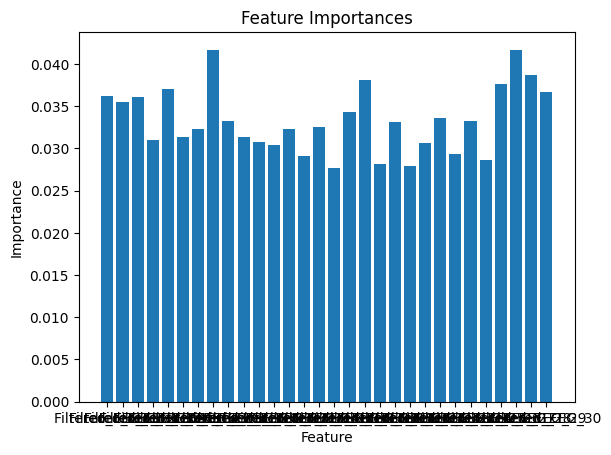

In [39]:
# If you want, you can also visualize feature importances with RandomForestClassifier
feature_importances = model.feature_importances_

# Assuming you have column names in X
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [62]:
from scipy.signal import savgol_filter


data = Manipulated_Alert_Data

# Parameters for the Savitzky-Golay filter
window_length = 33  # This needs to be an odd number
polyorder = 5      # Polynomial order

# Filtering each EEG column
for column in data.columns:
    if column.startswith('EEG'):
        data[f'Filtered_{column}'] = savgol_filter(data[column], window_length, polyorder)

# If there is a 'Substate' column you want to keep, ensure it's included in the new DataFrame
if 'Substate' in data.columns:
    filtered_data = data[[col for col in data.columns if col.startswith('Filtered_')] + ['Substate']]
else:
    # If there is no 'Substate' column, just take the filtered columns
    filtered_data = data[[col for col in data.columns if col.startswith('Filtered_')]]

# Save to Excel
output_file_path = 'Alert_filtered_data.xlsx'  # Replace with your desired output file path
filtered_data.to_excel(output_file_path, index=False)


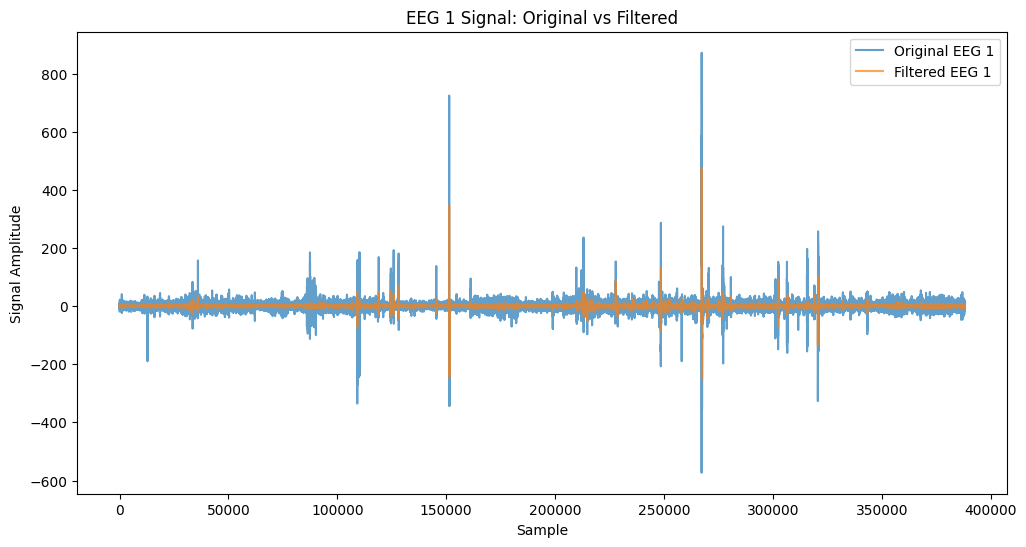

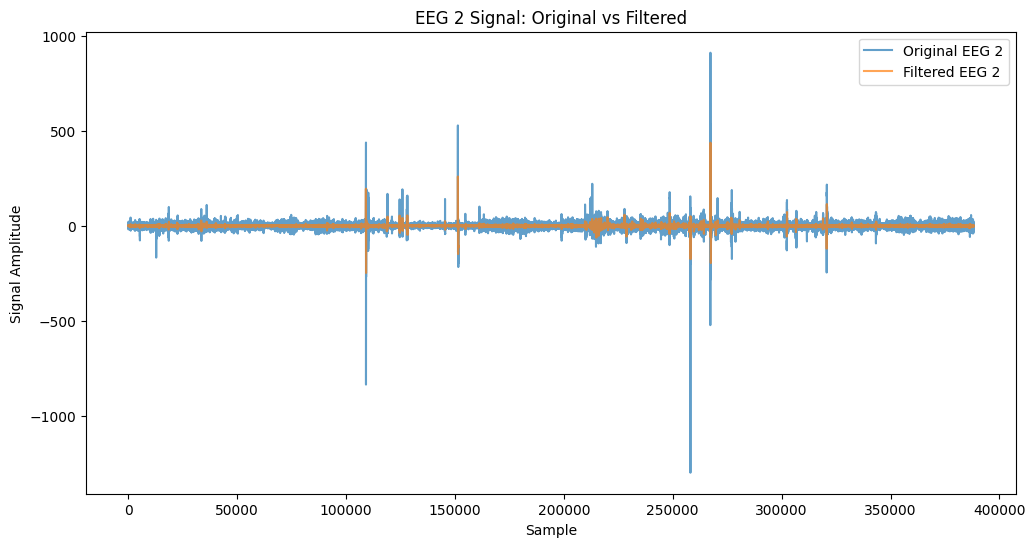

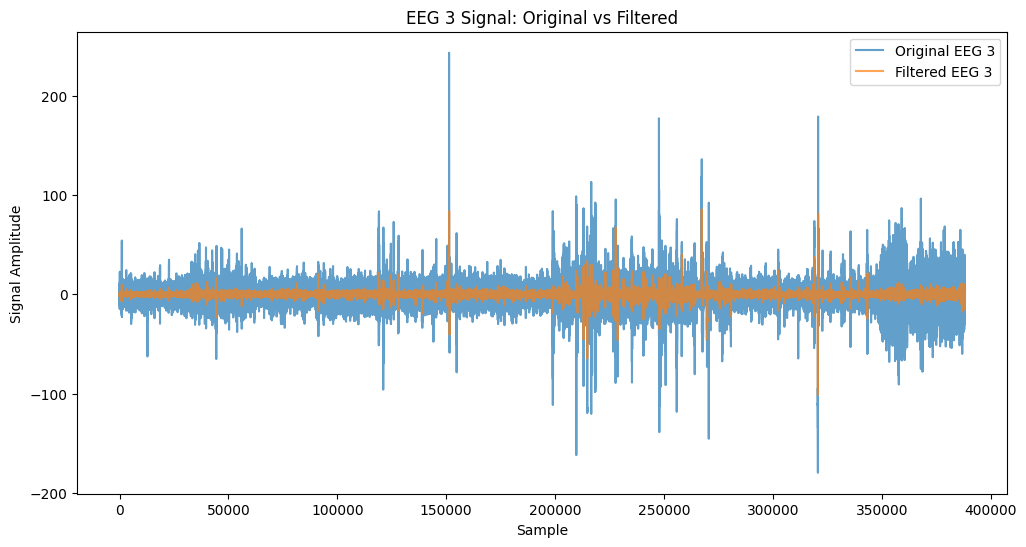

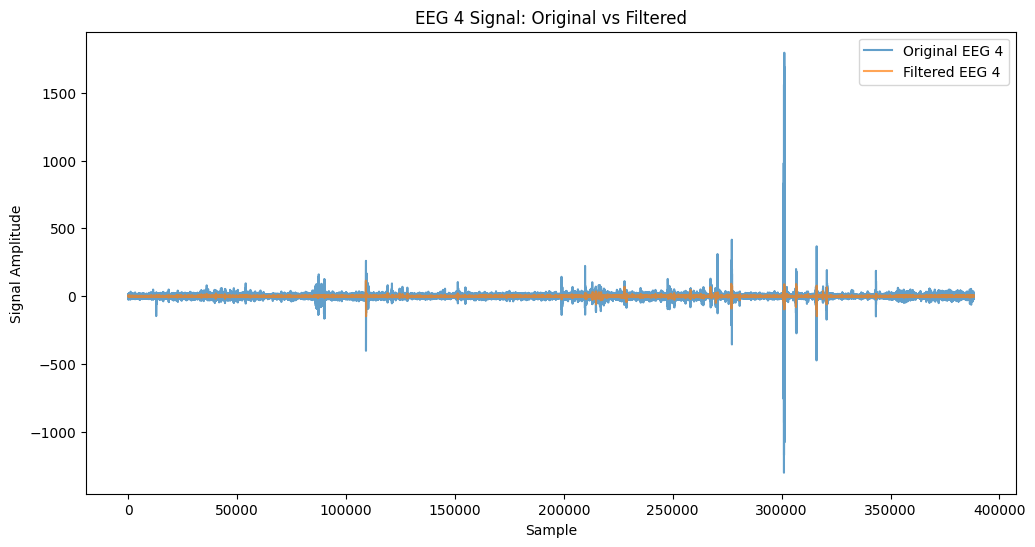

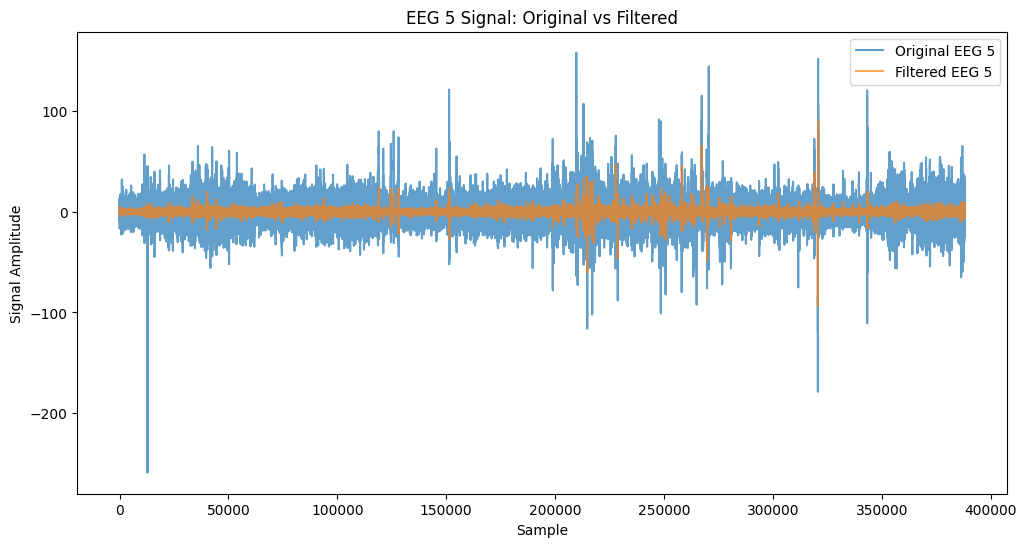

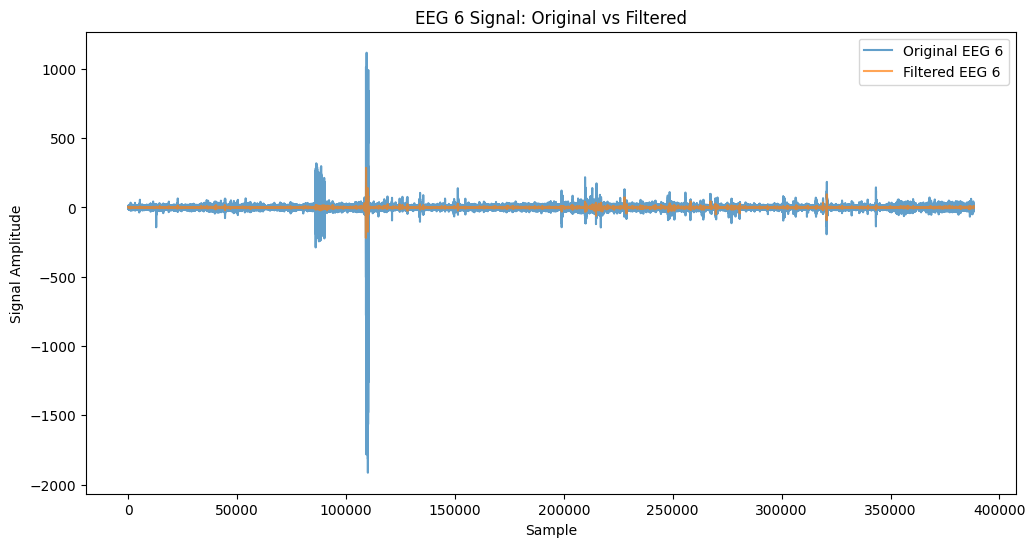

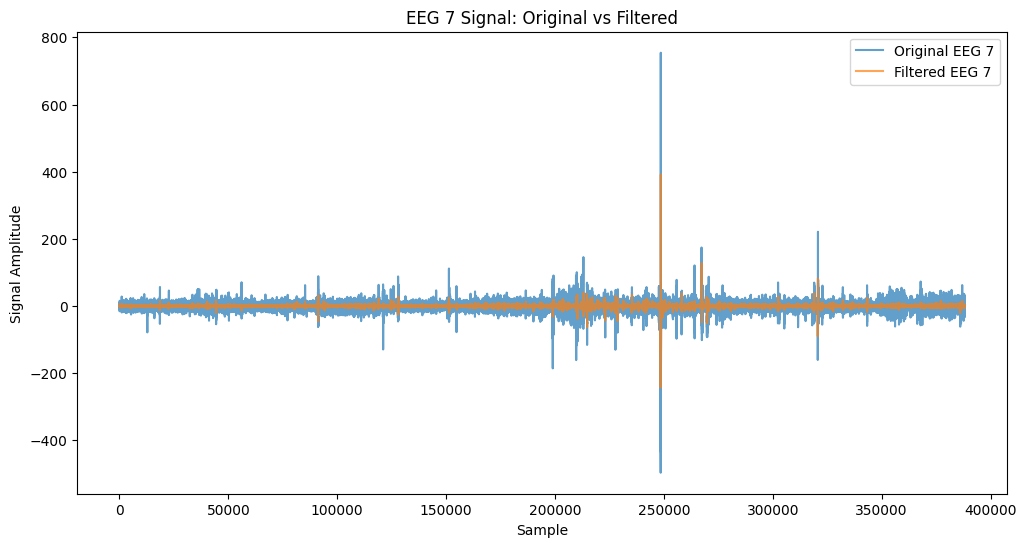

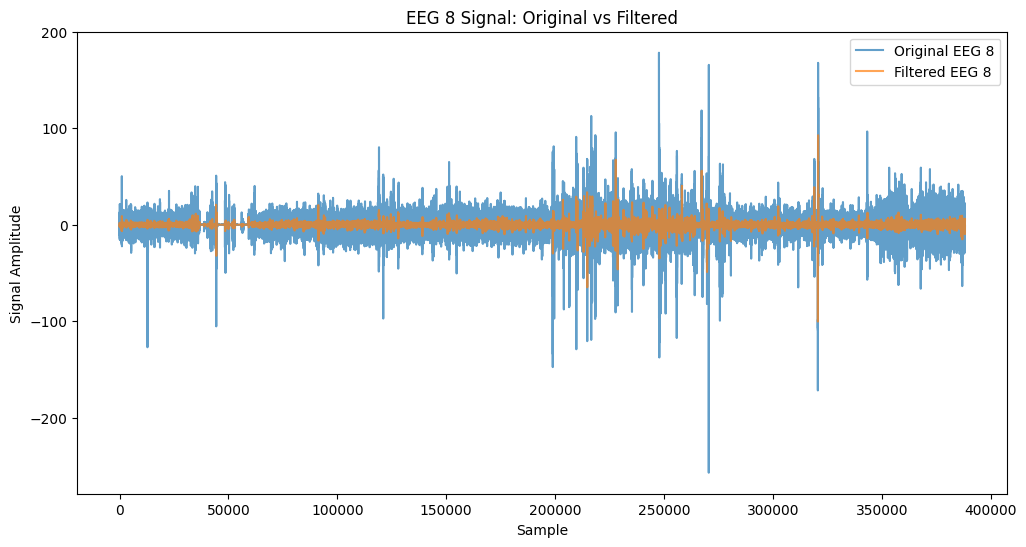

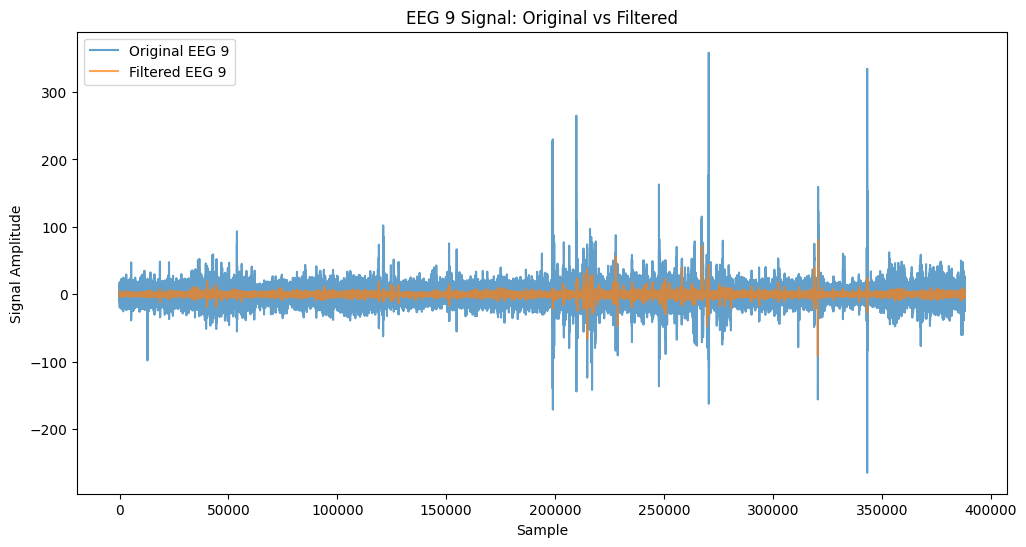

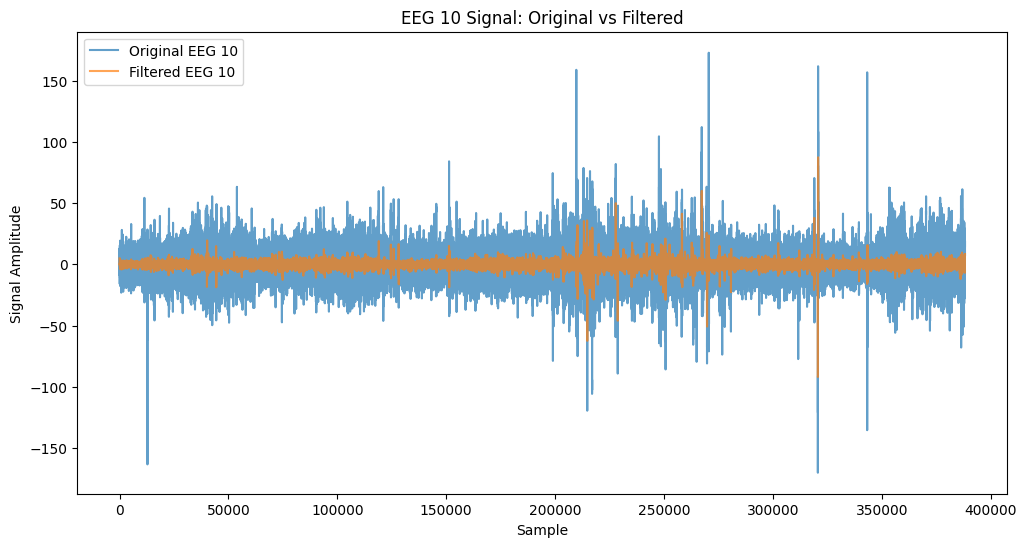

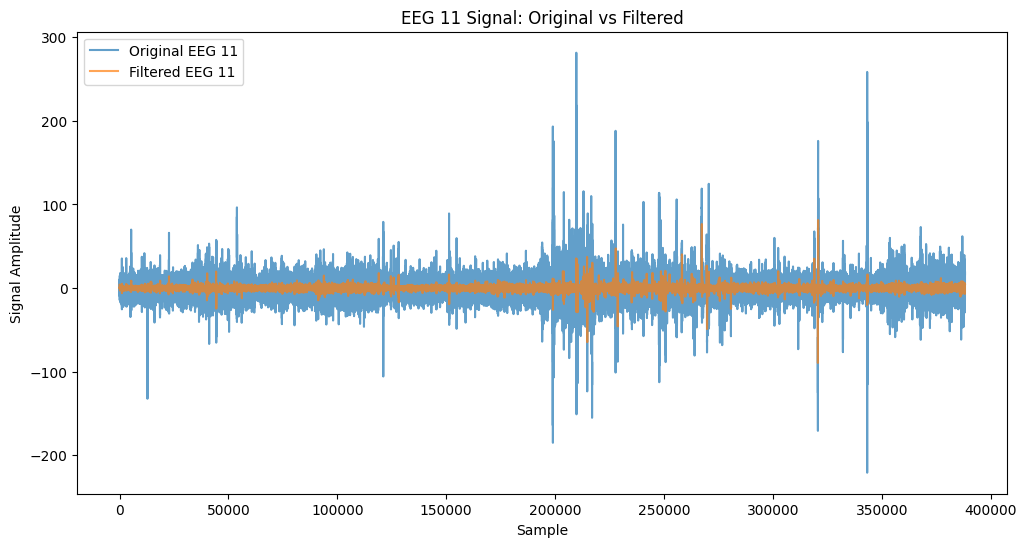

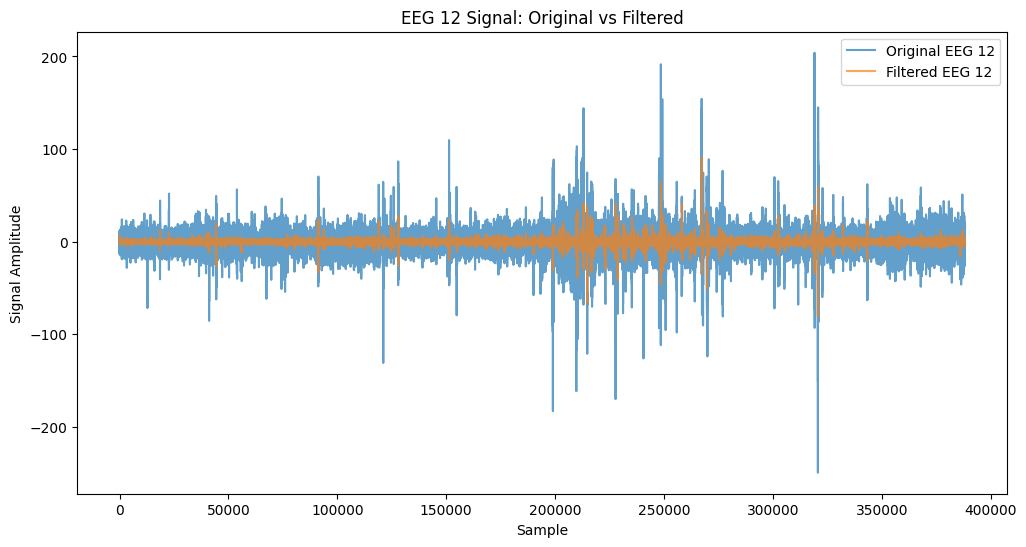

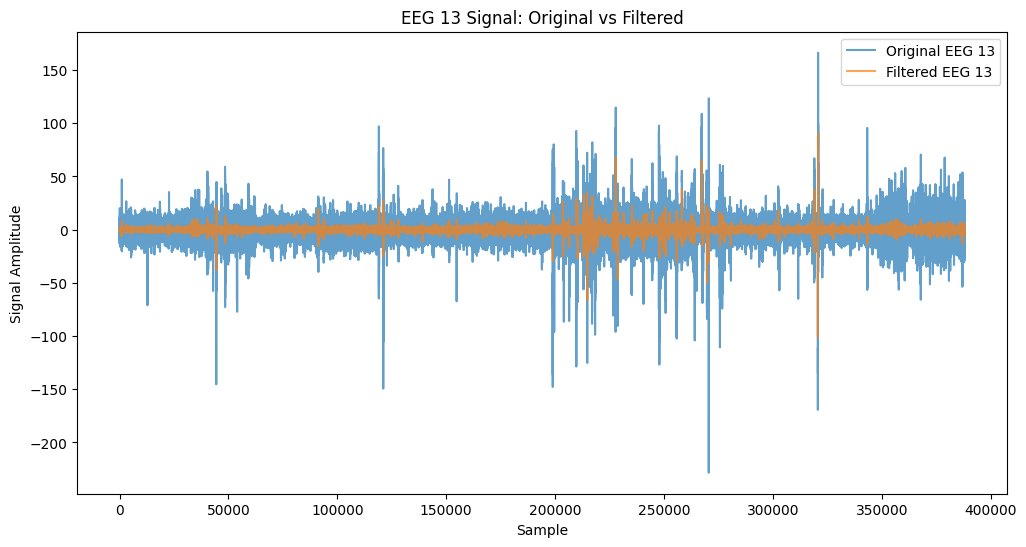

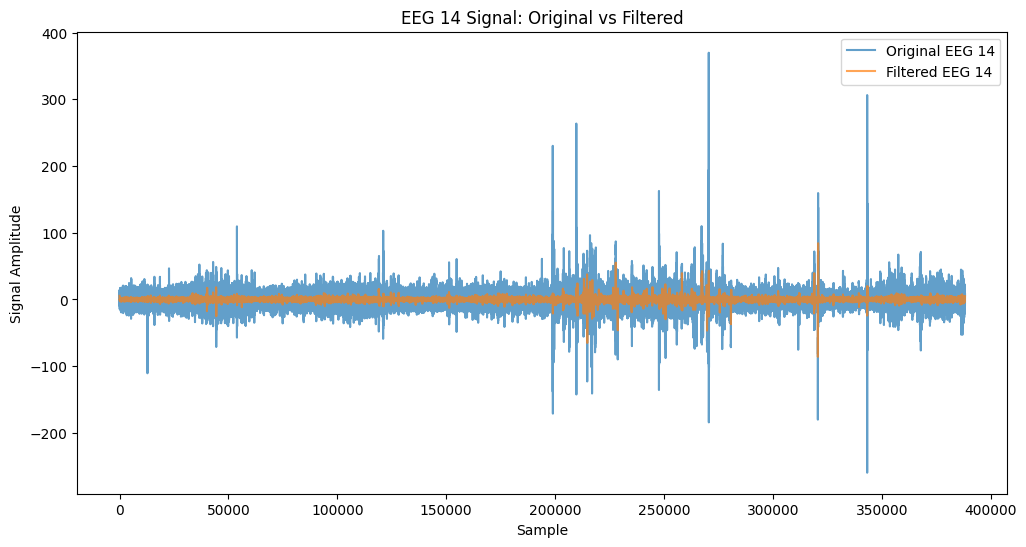

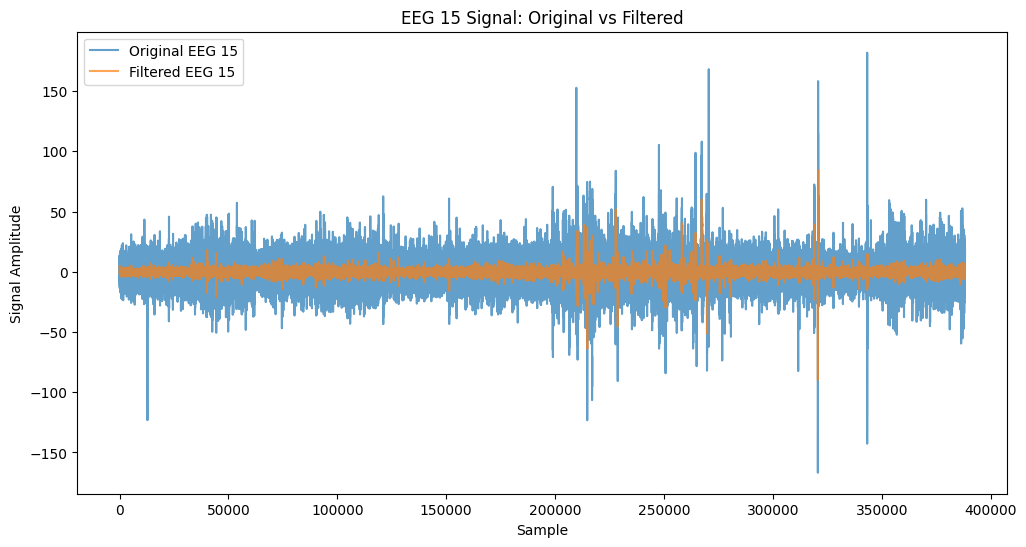

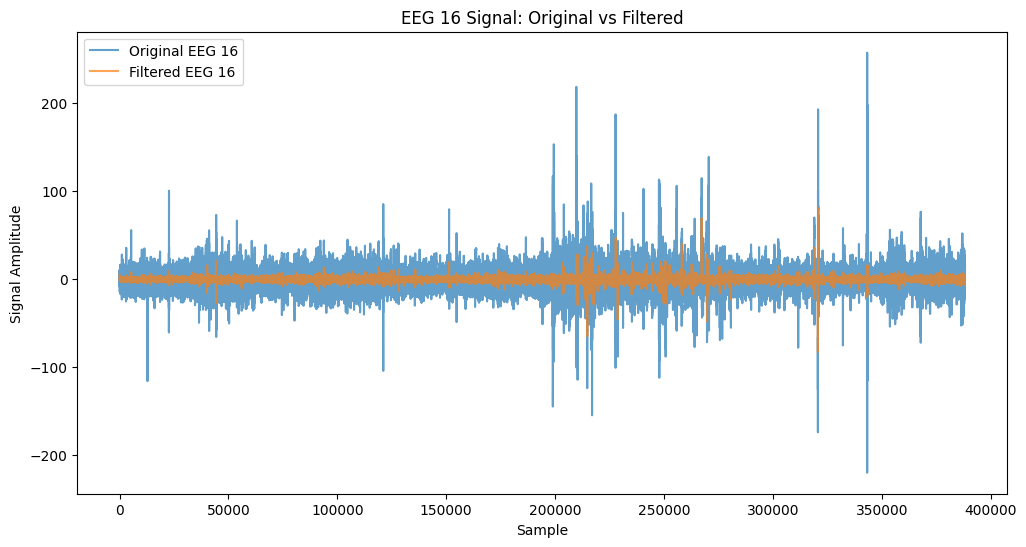

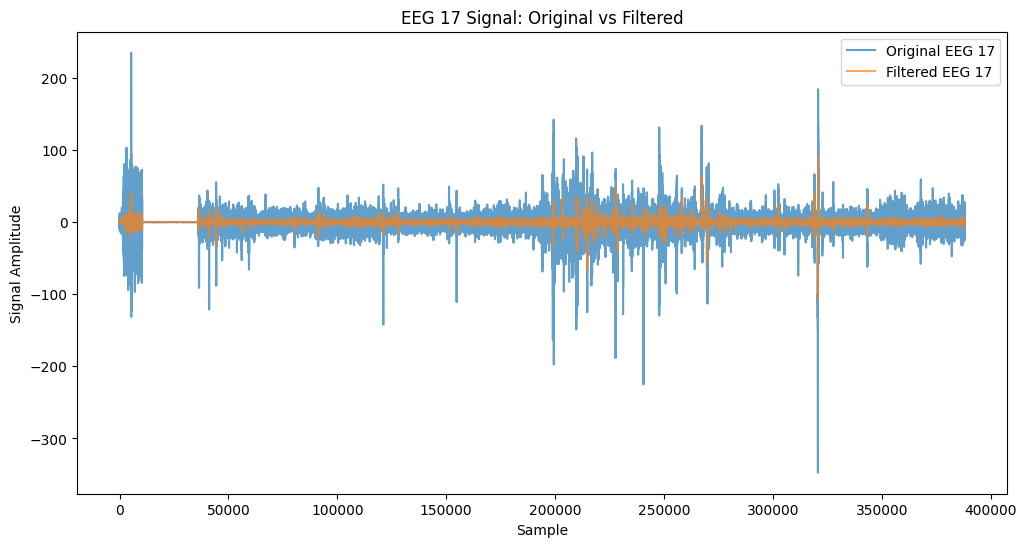

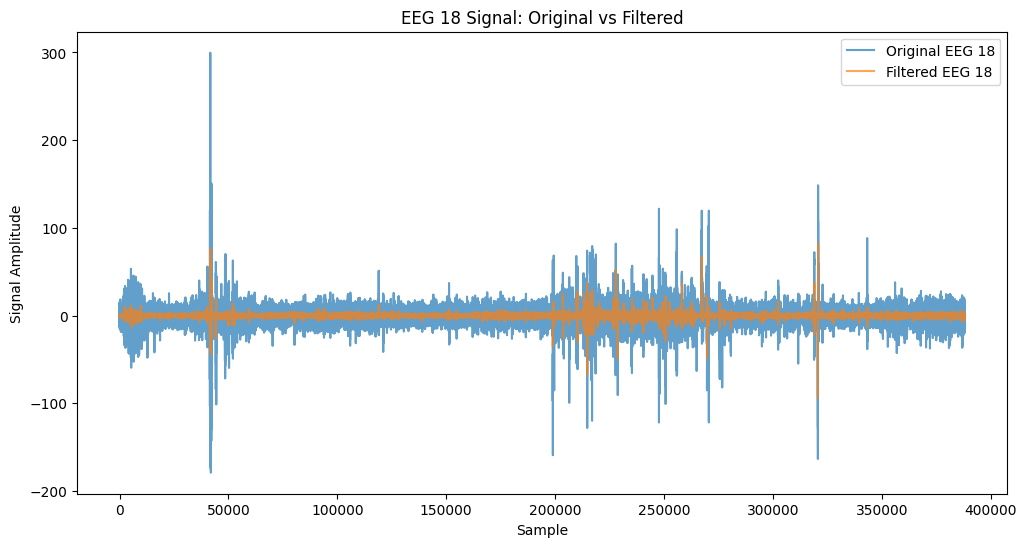

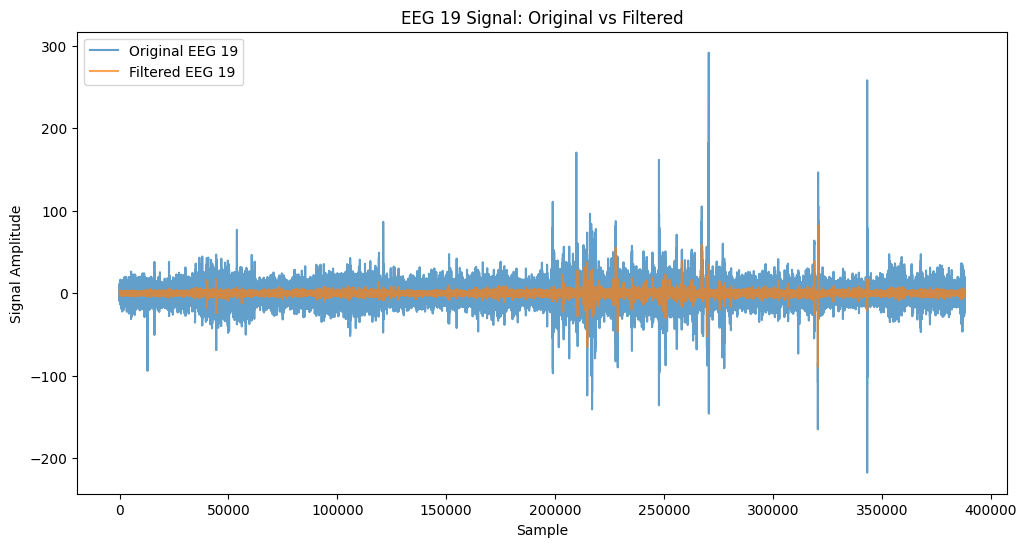

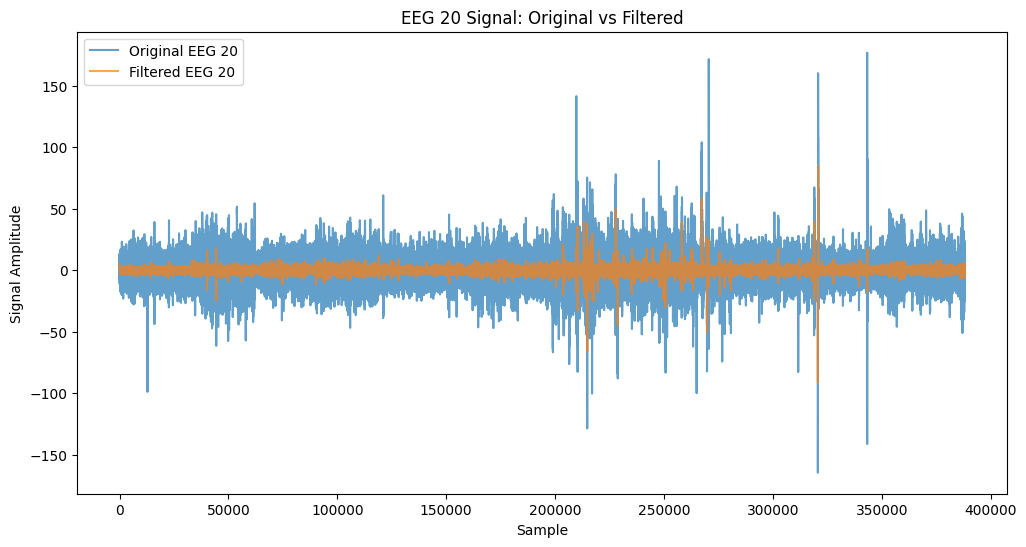

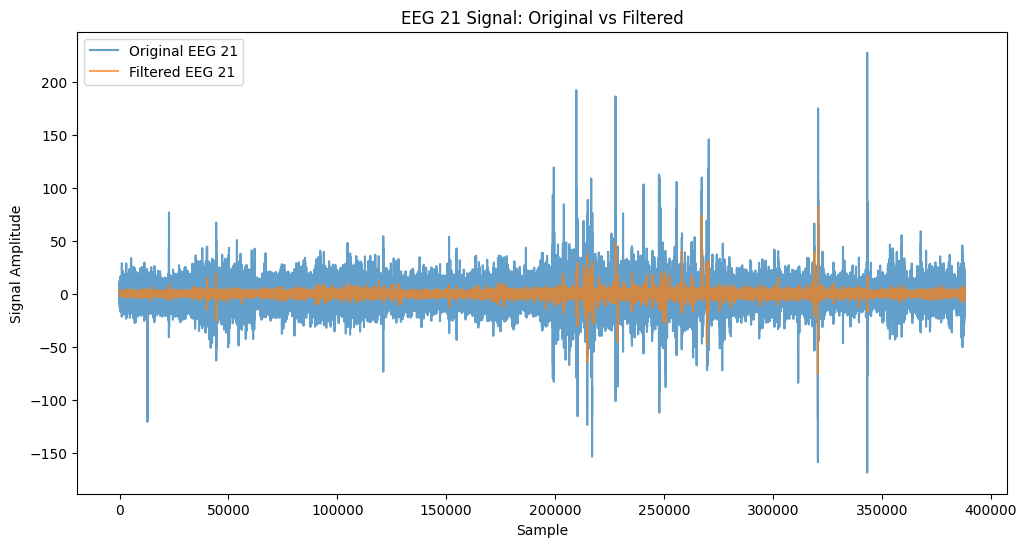

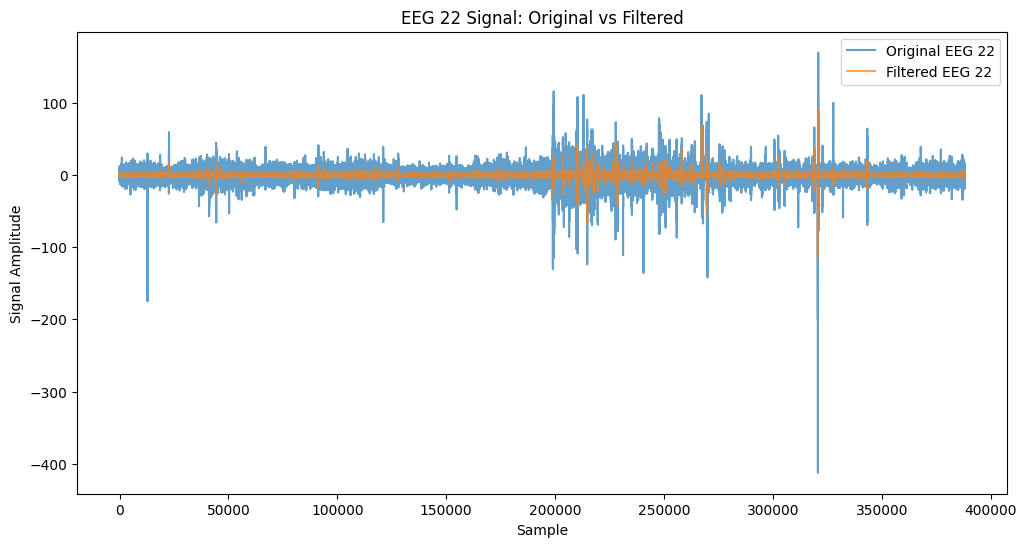

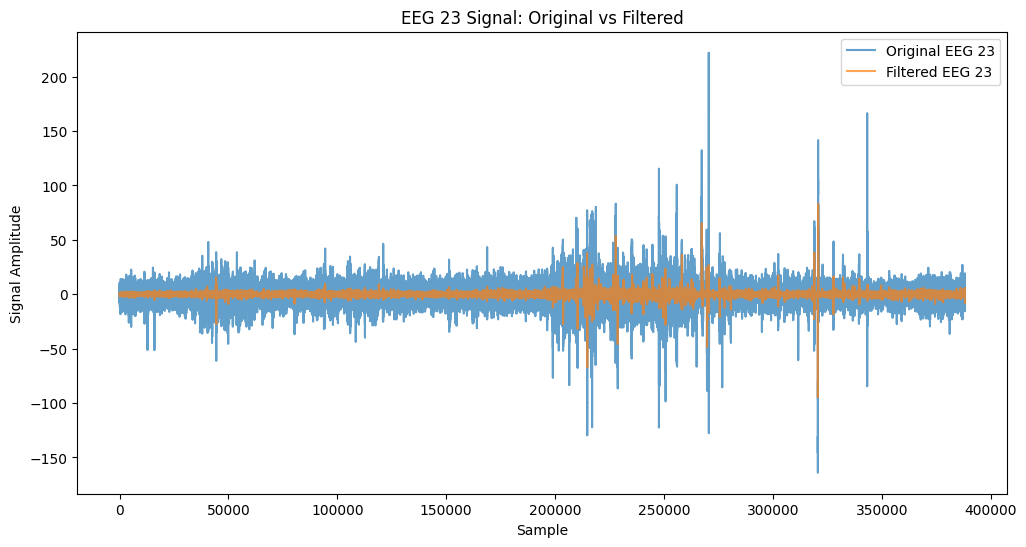

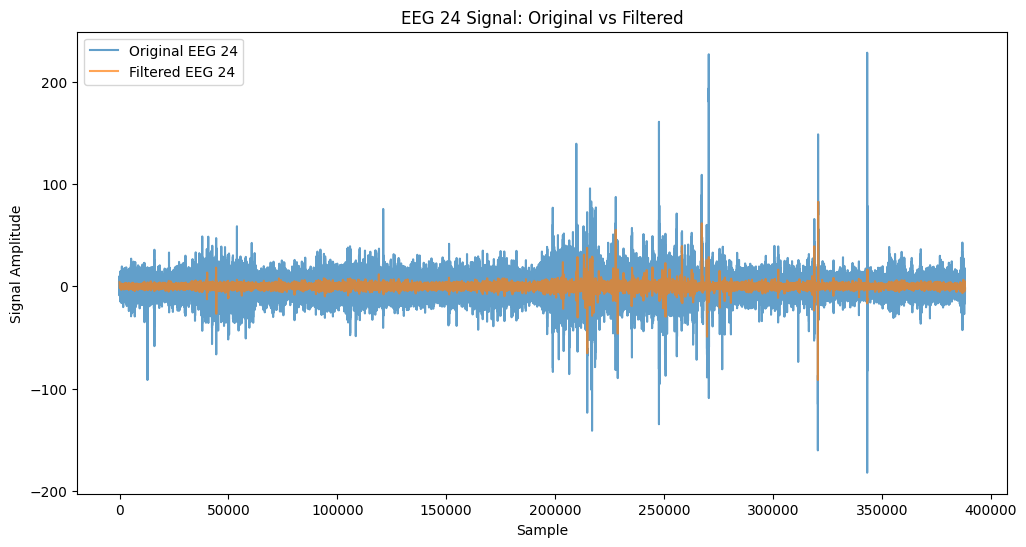

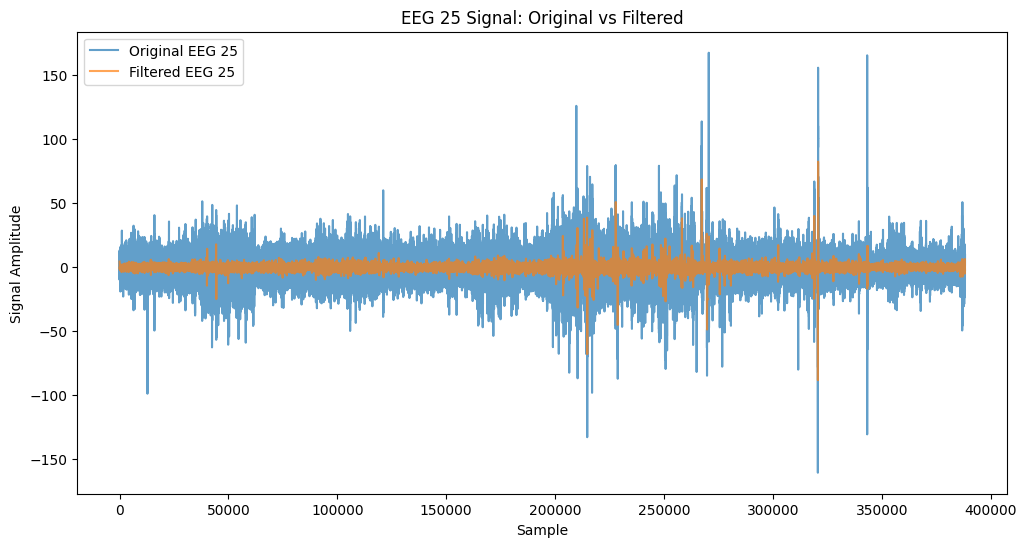

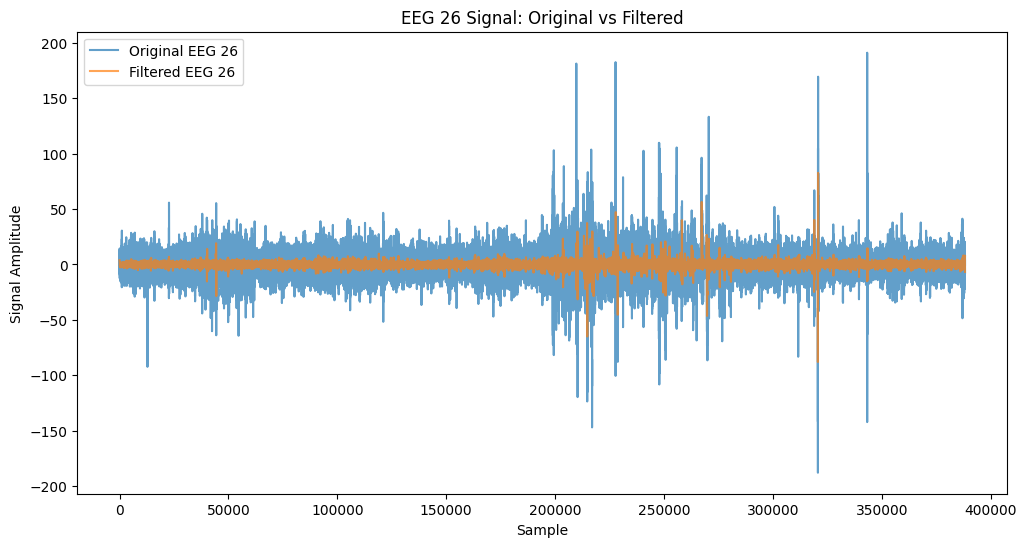

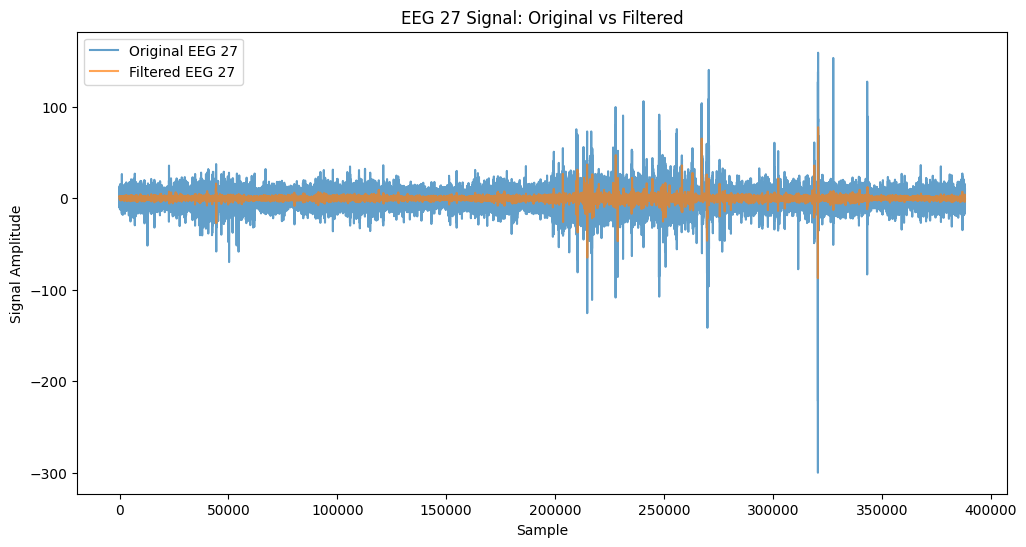

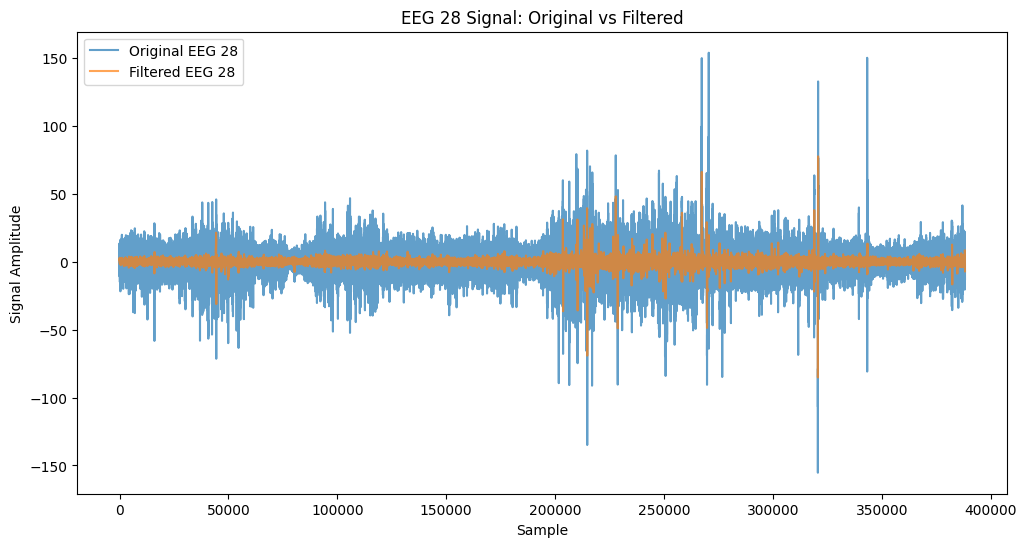

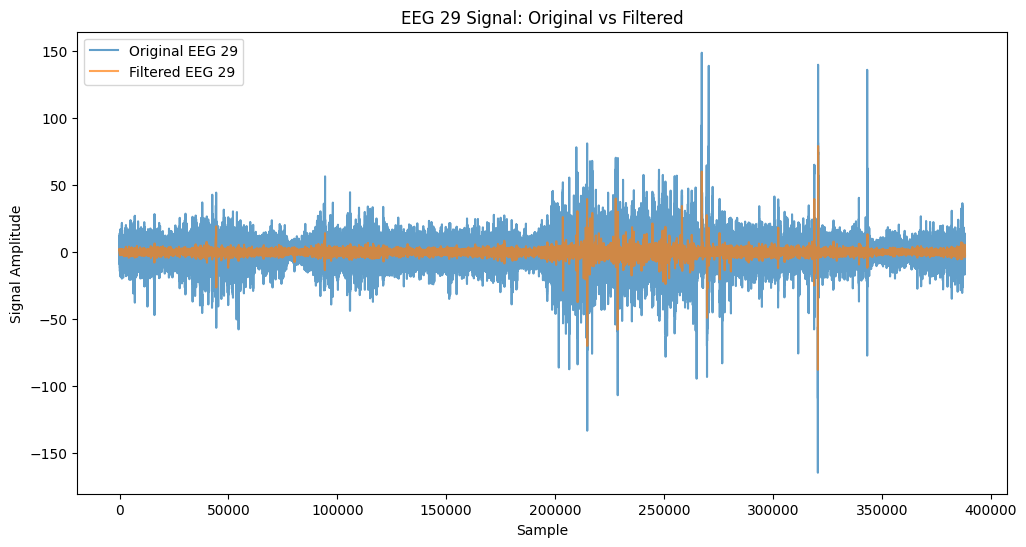

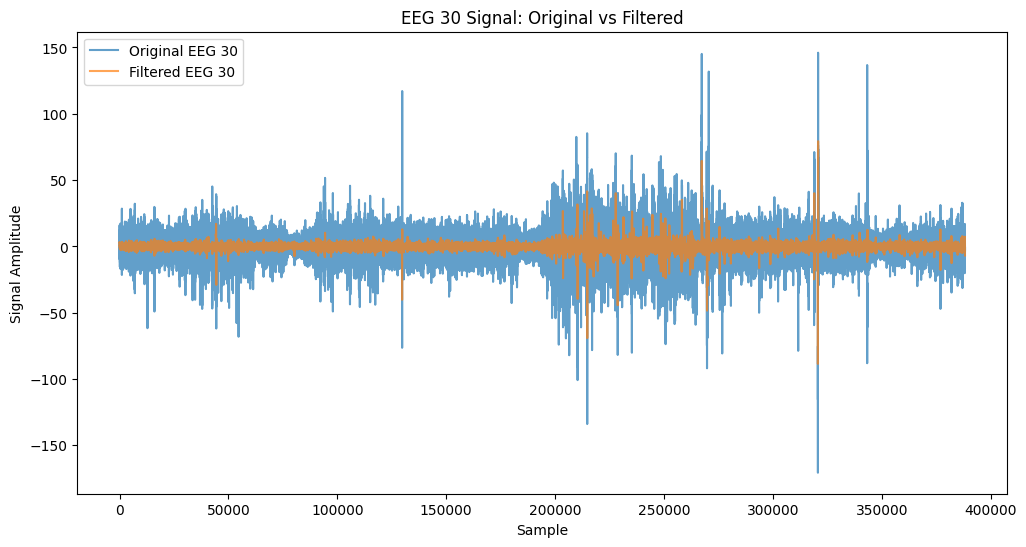

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and filtered datasets
original_data_path = 'Manipulated_Alert_Data.csv' 
filtered_data_path = 'filtered_data.xlsx'          
original_data = pd.read_csv(original_data_path)
filtered_data = pd.read_excel(filtered_data_path)

# Visualization
for column in original_data.columns:
    if column.startswith('EEG'):
        plt.figure(figsize=(12, 6))
        plt.plot(original_data[column], label=f'Original {column}', alpha=0.7)
        plt.plot(filtered_data[f'Filtered_{column}'], label=f'Filtered {column}', alpha=0.7)
        plt.title(f'{column} Signal: Original vs Filtered')
        plt.xlabel('Sample')
        plt.ylabel('Signal Amplitude')
        plt.legend()
        plt.show()


In [64]:
from scipy.signal import savgol_filter


data_1 = Manipulated_drowsy_data

# Parameters for the Savitzky-Golay filter
window_length = 43  # This needs to be an odd number
polyorder = 3      # Polynomial order

# Filtering each EEG column
for column in data.columns:
    if column.startswith('EEG'):
        data[f'Filtered_{column}'] = savgol_filter(data[column], window_length, polyorder)

# If there is a 'Substate' column you want to keep, ensure it's included in the new DataFrame
if 'Substate' in data.columns:
    filtered_data = data[[col for col in data.columns if col.startswith('Filtered_')] + ['Substate']]
else:
    # If there is no 'Substate' column, just take the filtered columns
    filtered_data = data[[col for col in data.columns if col.startswith('Filtered_')]]

# Save to Excel
output_file_path = 'Drowsy_filtered_data.xlsx'  # Replace with your desired output file path
filtered_data.to_excel(output_file_path, index=False)


In [29]:
from scipy.signal import savgol_filter


# Define the parameters for the Savitzky-Golay filter
window_length = 5
polyorder = 2

# Initialize an empty DataFrame to store the filtered columns
filtered_data = pd.DataFrame()

# Loop through each column (excluding the last column "substate")
for col_name in Manipulated_Alert_Data.columns[:-1]:
    # Apply Savitzky-Golay filter to the current column
    filtered_column = savgol_filter(
        Manipulated_Alert_Data[col_name], window_length, polyorder
    )

    # Add the filtered column to the DataFrame
    filtered_data[f'Filtered_EEG_{col_name[-2:]}'] = filtered_column

# Add the untouched "substate" column to the DataFrame
filtered_data['substate'] = Manipulated_Alert_Data['substate']

# Display the resulting DataFrame
print(filtered_data.head())

   Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
0         4.692836         4.882301        10.267160         5.119309   
1         3.531555         3.412224         4.167399         9.423416   
2         3.994308         3.476946         2.039568        11.697056   
3         6.192326         4.618773         3.097209        13.247834   
4         8.932174         7.758027         9.043083         9.645916   

   Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
0         9.077287        10.065400         8.142564        11.469807   
1         5.798641         5.834608         4.677151         3.903851   
2         4.576006         3.856444         3.406401         1.336036   
3         5.357696         3.696930         3.825421         3.376054   
4         7.638526         6.021283         6.808202        10.047465   

   Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_22  Filtered_EEG_23  \
0         7.479944        11.470015  ...    

# Final Data

In [40]:
from scipy.signal import savgol_filter
from sklearn.utils import shuffle



Manipulated_Alert_Data = Manipulated_Alert_Data
Manipulated_drowsy_data = Manipulated_drowsy_data

# Define the parameters for the Savitzky-Golay filter
window_length = 83
polyorder = 5

# Function to apply Savitzky-Golay filter to a dataset
def apply_savgol_filter(dataset):
    filtered_data = pd.DataFrame()
    for col_name in dataset.columns[:-1]:
        filtered_column = savgol_filter(
            dataset[col_name], window_length, polyorder
        )
        filtered_data[f'Filtered_EEG_{col_name[-2:]}'] = filtered_column
    filtered_data['substate'] = dataset['substate']
    return filtered_data

# Apply Savitzky-Golay filter to both datasets
filtered_alert_data = apply_savgol_filter(Manipulated_Alert_Data)
filtered_drowsy_data = apply_savgol_filter(Manipulated_drowsy_data)

# Concatenate both datasets row-wise
combined_data = pd.concat([filtered_alert_data, filtered_drowsy_data], ignore_index=True)

# Shuffle the combined dataset
shuffled_data = shuffle(combined_data, random_state=42)

# Display the resulting shuffled DataFrame
print(shuffled_data.head())

        Filtered_EEG_ 1  Filtered_EEG_ 2  Filtered_EEG_ 3  Filtered_EEG_ 4  \
31373          0.964740        -1.738307        -0.158422        -0.422775   
503322         2.991045         2.329785         5.357220         5.303581   
192821         2.254240        -0.420820         2.874916         2.599697   
604921        -4.176751        -5.275169        -6.307373        -3.110200   
110346         4.322662         2.846833         2.000554         5.220031   

        Filtered_EEG_ 5  Filtered_EEG_ 6  Filtered_EEG_ 7  Filtered_EEG_ 8  \
31373         -2.728421        -1.716630         0.978578        -0.301426   
503322         3.177434         3.468536         3.289996         5.217135   
192821         0.096838        -0.037525        -0.127477         2.390109   
604921        -2.607776        -4.060789        -4.525328        -6.465889   
110346         6.553581         4.027610         0.874310         1.795123   

        Filtered_EEG_ 9  Filtered_EEG_10  ...  Filtered_EEG_22

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data (replace Manipulated_EEG_Data with your actual data)
data = shuffled_data

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (substate, binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)



Accuracy: 0.9575

Confusion Matrix:
[[75616  2060]
 [ 4541 73073]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     77676
           1       0.97      0.94      0.96     77614

    accuracy                           0.96    155290
   macro avg       0.96      0.96      0.96    155290
weighted avg       0.96      0.96      0.96    155290



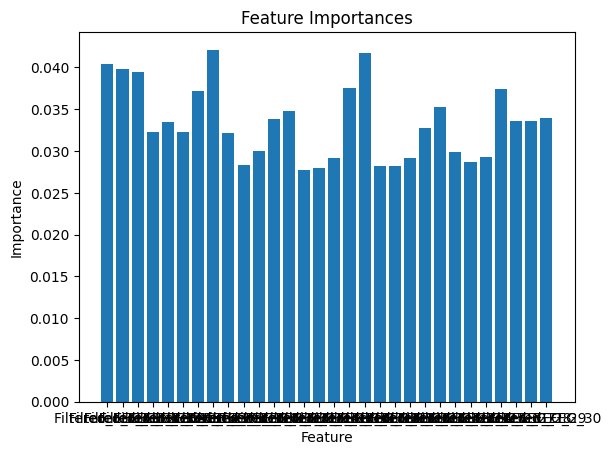

In [43]:
# If you want, you can also visualize feature importances with RandomForestClassifier
feature_importances = model.feature_importances_

# Assuming you have column names in X
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

If the current filtering approach is still not reducing the noise effectively, it's worth considering more advanced filtering techniques or adjusting the parameters of your current filter more aggressively. Here are a few suggestions:

Increase the Window Length and Adjust Polynomial Order Further:

You could try increasing the window length even more, but keep in mind that a very long window might overly smooth your signal and reduce its responsiveness to changes.
Adjust the polynomial order to find a balance between smoothness and preserving the signal's characteristics.
Apply a Different Type of Filter:

Butterworth Low-Pass Filter: This can be particularly effective for EEG data to remove high-frequency noise. You can experiment with the cutoff frequency to find the best balance.
Bandpass Filtering: If you know the frequency range of interest for your EEG data, a bandpass filter can help isolate this range, removing both high-frequency and low-frequency noise.
Combination of Filters:

Sometimes, a combination of filters can be more effective. For example, you might use a Butterworth filter to remove high-frequency noise and then apply a Savitzky-Golay filter for smoothing.
Advanced Techniques:

Wavelet Denoising: This is a powerful method for noise reduction in non-stationary signals like EEG. It allows for the decomposition of the signal into components at multiple resolutions.
Adaptive Filtering: If the noise characteristics are changing over time, an adaptive filter like the Least Mean Squares (LMS) algorithm might be more effective.

For filtering EEG data, there are several advanced alternatives to the Savitzky-Golay filter, each with its own advantages and use cases. Here are a few options:

Butterworth Filter: This is a type of signal processing filter designed to have a frequency response as flat as possible in the passband. It's particularly useful for EEG data as it can effectively filter out a specific frequency range while keeping the shape of the waveform.

Chebyshev Filters (Type I and II): These filters provide a sharper cutoff than Butterworth filters at the expense of ripples in the passband (Type I) or the stopband (Type II). They are useful when a strict control over the bandwidth of the filter is needed.

Elliptic Filter: Also known as Cauer filters, these provide the steepest roll-off for a given order and ripple specification. However, they exhibit ripples in both the passband and the stopband.

Wavelet Transform: This is used for time-frequency analysis of non-stationary signals like EEG. It's particularly useful for analyzing EEG data as it can decompose the signal into components at multiple frequencies and resolutions.

Kalman Filter: This is more of a predictive filter and is often used in real-time applications. It's particularly suitable for signals with noise that varies over time.

FIR (Finite Impulse Response) and IIR (Infinite Impulse Response) Filters: These are digital filters that can be tailored to specific requirements. FIR filters are always stable and don't have feedback, while IIR filters are more efficient but can be unstable.

Multirate Filters: These involve changing the sample rate of a signal for more efficient processing and are particularly useful in applications where different frequency bands are of interest.

Adaptive Filters: These filters adjust their parameters automatically to match the statistics of the input signal, which can be particularly useful for non-stationary signals like EEG.

The choice of filter depends on the specific characteristics of your EEG data, such as the nature of the noise, the frequency components of interest, and whether the data is stationary or non-stationary. Each filtering technique has its own advantages and trade-offs in terms of complexity, computational efficiency, and how they affect the signal.